# Inversi Linear
 
Inversi linear berarti hubungan antara data dengan model dapat dituangkan dalam sebuah persamaan yang linear, tentunya yang memenuhi syarat linearitas. Pada inversi linear ini biasanya hubungan antara data dengan model dapat dituangkan dalam persamaan maju:
 
$$ d=Gm, $$
 
dengan $d$ adalah berupa vektor data berukuran $M \times 1$, $G$ adalah matriks kernel atau Jacobian dengan ukuran $M \times N$, dab $m$ adalah vektor model dengan ukuran $N \times 1$. Solusi Least Square untuk inversi linear ini biasanya didapatkan dengan:
 
$$m=(G^TG)^{-1}G^Td$$

## Solusi Persamaan Garis Lurus
 
Sebagai contoh disini kita akan mencari solusi untuk sebuah persamaan garis lurus yang biasanya dituliskan dalam $y=bx+c$, dimana parameter model yang kita cari adalah nilai gradien $b$ dan intersep $c$ menggunakan data $y$. Data yang kita punya adalah:
 
| No  | x  |   y|
|---|---|---|
| 1  |  2 | 5  |
|  2 |  3 | 7  |
|3|4|9|
|  3 | 5  |  11 |
 
Kita plot terlebih dahulu:

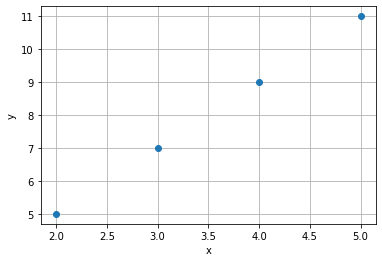

In [ ]:
import matplotlib.pyplot as plt
 
x=np.array([2,3,4,5])
y=np.array([5,7,9,11])
 
plt.scatter(x,y,zorder=110)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

Kita kemudian terjemahkan data dan Jacobian dalam Python:

In [ ]:
import numpy as np
 
d=np.array([5,7,9,11])
 
G=np.array([[2, 1],
            [3, 1],
            [4, 1],
            [5, 1]])

Selanjutnya kita menghitung aljabar untuk beberapa operator yang kita butuhkan:

In [ ]:
GTd = G.T @ d
GTd

array([122,  32])

In [ ]:
GTG = (G.T @ G)
GTGinv = np.linalg.inv(GTG)
GTGinv

array([[ 0.2, -0.7],
       [-0.7,  2.7]])

Selanjutnya model dapat kita cari:

In [ ]:
m = GTGinv @ GTd
m

array([2., 1.])

Dari perhitungan kita mendapatkan nilai gradien $b$ adalah 2 dan intersep $c$ adalah 1, selanjutnya coba kita plot hasil perhitungan tersebut

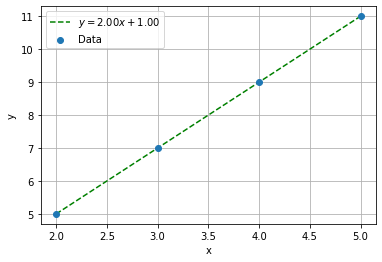

In [ ]:
import matplotlib.pyplot as plt
 
x=np.array([2,3,4,5])
y=np.array([5,7,9,11])
 
plt.scatter(x,y,zorder=110, label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
 
 
# hasil perhitungan
b=m[0]
c=m[1]
yl=b*x+c
 
plt.plot(x,yl, linestyle="--", color="green", \
    label="$y={:.2f}x+{:.2f}$".format(b,c))
 
plt.legend()
plt.show()

## Solusi Persamaan Garis Lurus dengan Noise
 
Kira akan berikan noise pada data $d$, noise random dengan rerata 0 dan deviasi standar 0,5:

In [ ]:
noise=np.random.normal(0, 0.5, len(d))
 
d_noise = d+noise
d_noise

array([ 5.3795573 ,  6.7313757 ,  8.52595614, 10.54415629])

Kita plot terlebih dahulu:

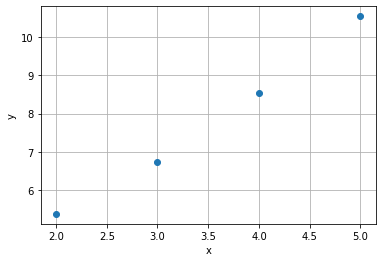

In [ ]:
import matplotlib.pyplot as plt
 
x=np.array([2,3,4,5])
y=np.array([5,7,9,11])
 
plt.scatter(x,d_noise,zorder=110, label="Data dengan noise")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

Dengan cara yang sama kita dapat menghitung model:

In [ ]:
GTd_noise = G.T @ d_noise
m_noise = GTGinv @ GTd_noise
m_noise

array([1.72883774, 1.74432926])

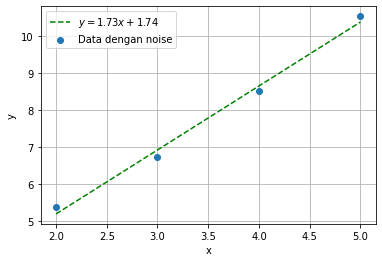

In [ ]:
plt.scatter(x,d_noise,zorder=110, label="Data dengan noise")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
 
 
# hasil perhitungan
b=m_noise[0]
c=m_noise[1]
yln=b*x+c
 
plt.plot(x,yln, linestyle="--", color="green", \
    label="$y={:.2f}x+{:.2f}$".format(b,c))
 
plt.legend()
plt.show()

## Kuantifikasi Error
 
Error dapat kita kuantifikasi dengan menggunakan L2 norm yang dapat diterjemahkan dalam Python:

In [ ]:
diff = d_noise - yln
 
misfit = diff.T @ diff
misfit

0.11341732761167485

# Inversi Dilenarisasi
 
Inversi pada masalah nonlinear biasanya dilinearisasi dengan pendekatan deret Taylor sampai orde kedua, inversi dilakukan pada ruang sempit error model dan error data.

## Inversi hiposenter
 
Contoh kasus yang akan kita gunakan adalah perhitungan episenter, untuk mempermudah kita akan menganggap bawah permukaan merupakan medium homogen, kasus yang kita hadapi adalah:

![geigermerapi](img/merapi_stations.png)

Stasiun-stasiun di bawah ini merekam gempa Vukano Tektonik dengan waktu tiba gelombang P dijabarkan pada tabel di atas, waktu 0s adalah 17.00.00 WIB.
Jika kecepatan homogen 3 km/s, cari hiposenter !

| id	| nama	| alt| 	x	| y| arr
|---|---|---|---|---| --- |
|1	|Gemer	|1331|	435634|	9166075| 1.2689472 |
|2	|Klatakan	|1880	|437186|	9167475| 1.11920458 |
|3|	Selo|	1883|	439270|	9168756| 1.23894408 |
|4|	Pasar Bubar|	2569|	439845|	9166732| 1.26084491 |
|5|	Kendil|	1622|	439937|	9164018 | 1.2827079|

Persamaan maju yang menghubungkan data berupa waktu tiba ($T_{arr}$) dengan model yang kita cari ($T_0$, $x$,$y$,$z$) adalah:
 
$$T_{arr}=T_0 + \frac{\sqrt{(x-x_s)^2+(y-y_s)^2+(z-z_s)^2}}{v},$$
 
dengan $x_s$,$y_s$,$z_s$ menunjukkan lokasi stasiun.
 
Menggunakan ekspansi Taylor sampai orde dua kita mendapatkan:
 
$$ m = m_0 + \Delta m $$
 
dengan $m_0$ merupakan tebakan awal dan $\Delta m$ merupakan koreksi dari model kita.
 
Nilai $\Delta m$ dapat kita estimasi dengan Least Square:
 
$$\Delta m=(G^TG)^{-1}G^T \Delta d$$ 
 
dengan $G$ berisi turunan parsial persamaan maju terhadap masing-masing model.
 
Kemudian dapat membuat Jacobian tersebut dengan isi masing-masing adalah:
 
\begin{bmatrix}
 \frac{x-x_{s1}}{vD_1} & \frac{y-y_{s1}}{vD_1}  & \frac{z-z_{s1}}{vD_1}  & 1 \\ 
\frac{x-x_{s2}}{vD_2} & \frac{y-y_{s2}}{vD_2}  & \frac{z-z_{s2}}{vD_2}  & 1 \\  
 \vdots & \vdots &  \vdots & \vdots\\ 
 \frac{x-x_{sN}}{vD_N} & \frac{y-y_{sN}}{vD_N}  & \frac{z-z_{sN}}{vD_N}  & 1 \\ 
\end{bmatrix}
 
Tugas utama kita adalah membuat matriks $G$ di atas menggunakan loop.